# EDA: Unicorns of the World (2021)

This exploratory data analysis (EDA) focuses on the "Unicorns of the World" dataset from 2021. Despite its specific timeframe, the analysis can offer valuable insights for the present day. By examining unicorn data from 2021, we can gain historical context, analyze industry trends, understand investment patterns, and identify entrepreneurial ecosystems. These insights remain relevant and can assist in understanding the current state of the unicorn landscape.

## Loading The Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
startups = pd.read_csv("/content/drive/MyDrive/EDA datasets/World_Wide_Unicorn_Startups.csv")

## Understanding The Data

In [ ]:
startups.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


### Number Of Unicorns in Each Industry

In [ ]:
startups["Industry"].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

In [ ]:
# Fintech and Finntech are the same .
startups["Industry"] = startups["Industry"].replace("Finttech","Fintech")
startups["Industry"] = startups["Industry"].replace("Artificial intelligence","Artificial Intelligence")

In [ ]:
startups_by_industry = startups["Industry"].value_counts()

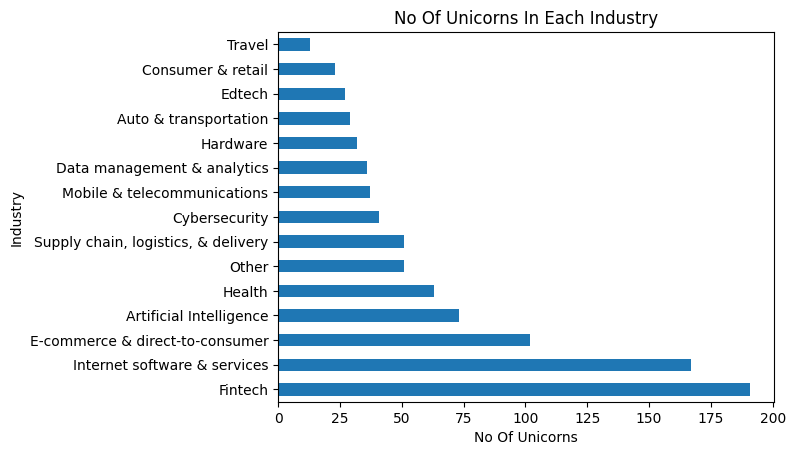

In [ ]:
import matplotlib.pyplot as plt

startups_by_industry.plot(kind='barh')

plt.xlabel('No Of Unicorns')
plt.ylabel('Industry')
plt.title('No Of Unicorns In Each Industry')

plt.show()

## Unicorn Market Cap Of Each Industry

In [ ]:
industry_valuation = startups.groupby('Industry')['Valuation'].sum()

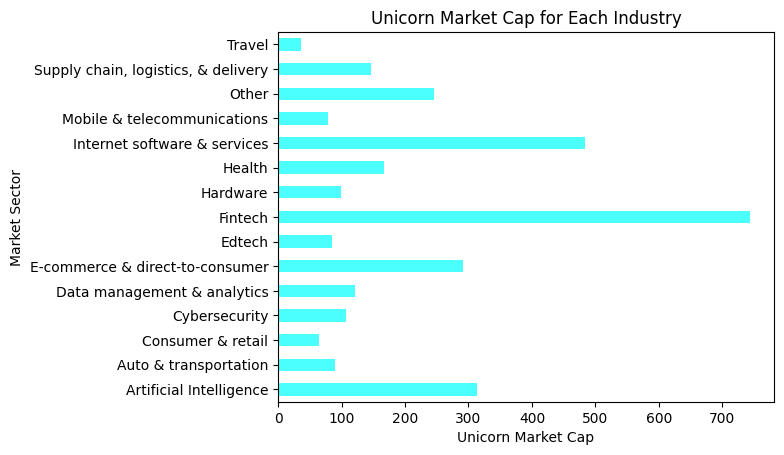

In [ ]:
industry_valuation.plot(kind='barh', color='cyan', alpha=0.7, legend=False)

plt.ylabel('Market Sector')
plt.xlabel('Unicorn Market Cap')
plt.title('Unicorn Market Cap for Each Industry')

plt.show()

## Most Valued Company In Each Sector

In [ ]:
max_valuation_indices = startups.groupby('Industry')['Valuation'].idxmax()

largest_companies = startups.loc[max_valuation_indices].reset_index(drop=True)

print(largest_companies[["Company", "Industry", "Valuation"]])


              Company                             Industry  Valuation
0           Bytedance              Artificial Intelligence      140.0
1   ZongMu Technology                Auto & transportation       11.4
2           JUUL Labs                    Consumer & retail       12.0
3              Tanium                        Cybersecurity        9.0
4          Databricks          Data management & analytics       38.0
5         Xiaohongshu      E-commerce & direct-to-consumer       20.0
6              BYJU's                               Edtech       21.0
7              Stripe                              Fintech       95.0
8     DJI Innovations                             Hardware       15.0
9      Devoted Health                               Health       12.6
10              Canva         Internet software & services       40.0
11            Niantic          Mobile & telecommunications        9.0
12             SpaceX                                Other      100.3
13          Instacar

##  Top 10 Countries With Most Unicorns

In [ ]:
startups_by_country = startups["Country"].value_counts()[:10]

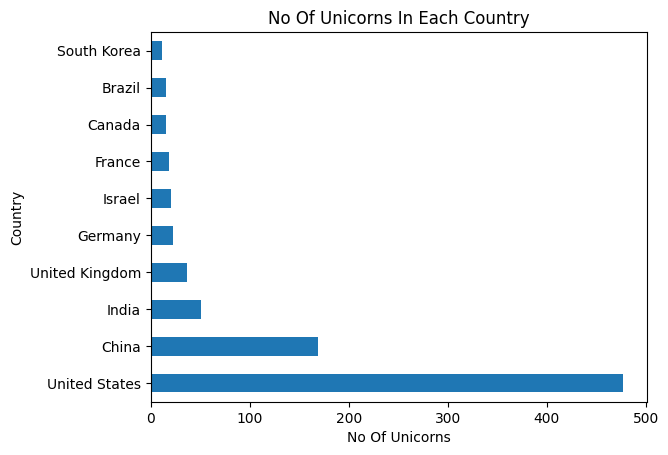

In [ ]:
import matplotlib.pyplot as plt

startups_by_country.plot(kind='barh')

plt.xlabel('No Of Unicorns')
plt.ylabel('Country')
plt.title('No Of Unicorns In Each Country')

plt.show()

## Unicorn Market Cap By Country

In [ ]:
country_valuation = startups.groupby('Country')['Valuation'].sum().sort_values(ascending=False)[:12]
country_valuation

Country
United States     1604.03
China              569.48
United Kingdom     150.29
India              148.45
Germany             66.63
Brazil              61.05
Sweden              58.08
Australia           50.60
Israel              43.82
Hong Kong           41.45
Canada              37.73
France              35.61
Name: Valuation, dtype: float64

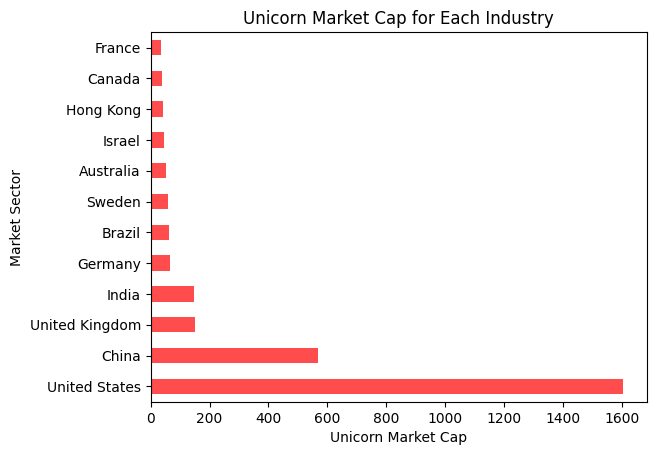

In [ ]:
country_valuation.plot(kind='barh', color='red', alpha=0.7, legend=False)

plt.ylabel('Market Sector')
plt.xlabel('Unicorn Market Cap')
plt.title('Unicorn Market Cap for Each Industry')

plt.show()

## Cities With Most Startups

In [ ]:
startups_by_city = startups["City"].value_counts()[:10]

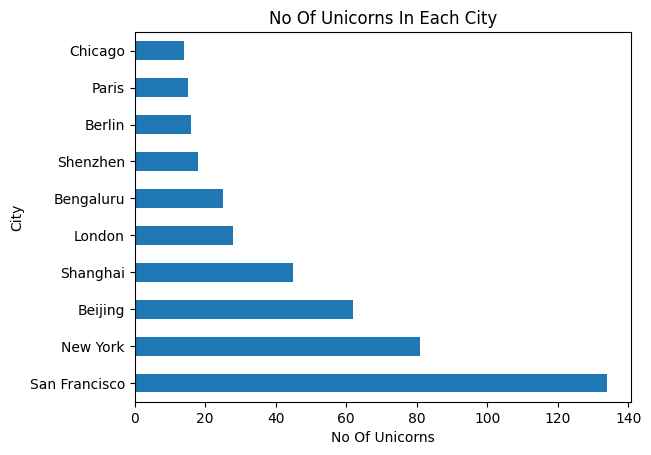

In [ ]:
import matplotlib.pyplot as plt

startups_by_city.plot(kind='barh')

plt.xlabel('No Of Unicorns')
plt.ylabel('City')
plt.title('No Of Unicorns In Each City')

plt.show()

## United States Unicorns

In [ ]:
us_startups = startups[startups["Country"] == "United States"]

### No Unicorns In Each Sector In US

In [ ]:
us_startups_by_sector = us_startups["Industry"].value_counts()

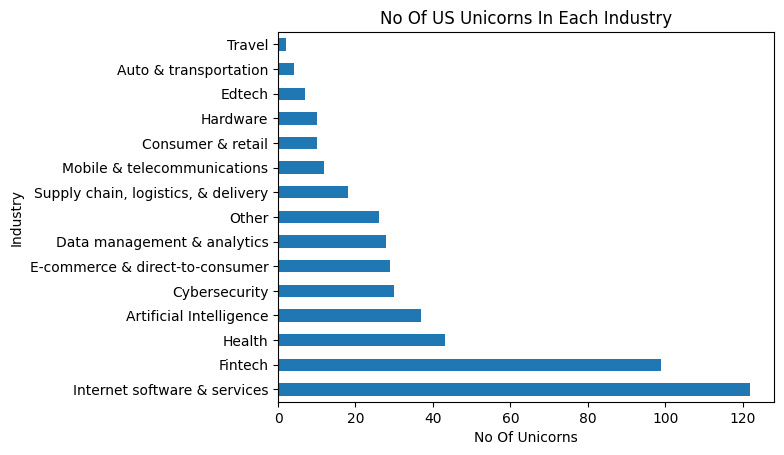

In [ ]:
us_startups_by_sector.plot(kind='barh')

plt.xlabel('No Of Unicorns')
plt.ylabel('Industry')
plt.title('No Of US Unicorns In Each Industry')

plt.show()

### Most Valued US Startups

In [ ]:
top_us_startups = us_startups.sort_values(by = "Valuation", ascending = False)

In [ ]:
top_us_startups.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


**5 Most Valued Startups in US**
* SpaceX
* Stripe
* Instacart
* Databricks
* Epic Games

### Top Startups in San Francisco

In [ ]:
sf_startups = us_startups[us_startups["City"] == "San Francisco"]

In [ ]:
top_sf = sf_startups.sort_values(by = "Valuation", ascending = False)
top_sf.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
10,Chime,25.0,3/5/2019,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,3
21,Plaid Technologies,13.4,12/11/2018,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,11,12


**Most Valued Startups in San Francisco**
* Stripe
* Instacart
* Databricks
* Chime
* Plaid Technologies

### San Francisco Startups In Each Sector

In [ ]:
sf_startups_by_sector = sf_startups["Industry"].value_counts()

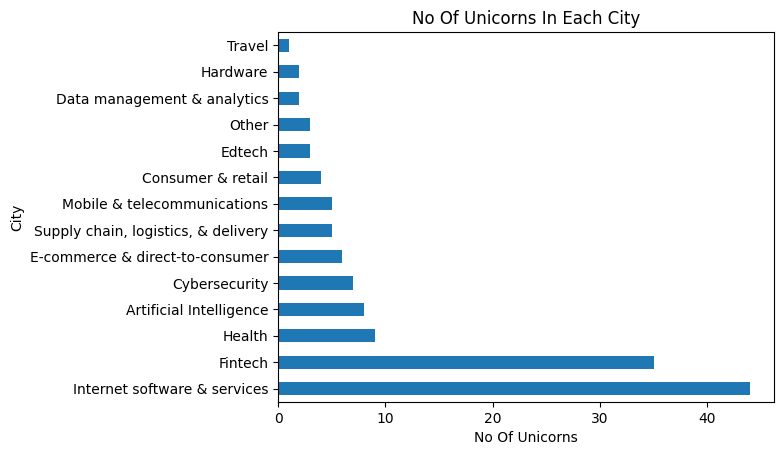

In [ ]:
sf_startups_by_sector.plot(kind='barh')

plt.xlabel('No Of Unicorns')
plt.ylabel('City')
plt.title('No Of Unicorns In Each City')

plt.show()

In [ ]:
sf_startups = us_startups[us_startups["City"] == "San Francisco"]

### Top Startups In New York

In [ ]:
nyc_startups = us_startups[us_startups["City"] == "New York"]

In [ ]:
top_nyc = nyc_startups.sort_values(by = "Valuation", ascending = False)
top_nyc.head()

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
43,Digital Currency Group,10.0,11/1/2021,United States,New York,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,11
63,Fireblocks,8.0,7/27/2021,United States,New York,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,27,7
75,Gemini,7.1,11/19/2021,United States,New York,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2021,19,11
92,Better.com,6.0,11/10/2020,United States,New York,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2020,10,11
120,Ro,5.0,7/27/2020,United States,New York,Health,"0 Sequoia Capital China, SIG Asia Investm...",2020,27,7


**Most Valued Startups in New York**
* Digital Currency Group
* Fireblocks
* Gemini
* Better.com
* Ro

### New York Startups In Each Sector

In [ ]:
nyc_startups_by_sector = nyc_startups["Industry"].value_counts()

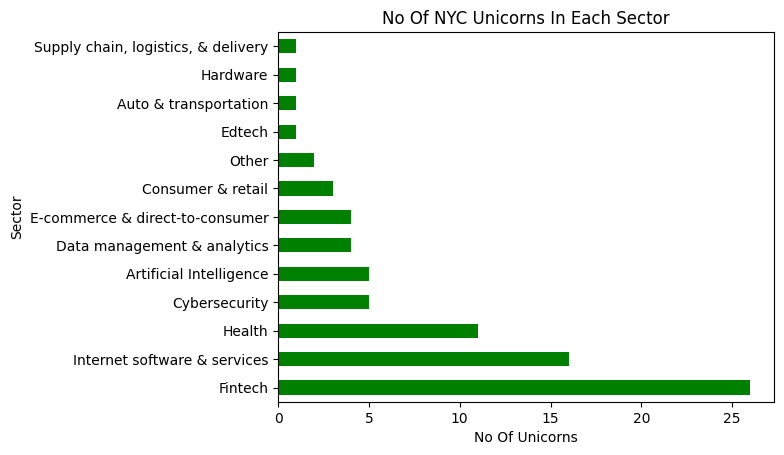

In [ ]:
nyc_startups_by_sector.plot(kind='barh',color='green')

plt.xlabel('No Of Unicorns')
plt.ylabel('Sector')
plt.title('No Of NYC Unicorns In Each Sector')

plt.show()

## Cities With Most Unicorns In Different Sectors

### In Fintech

In [ ]:
fintech_startups = startups[startups["Industry"] == "Fintech"]

In [ ]:
ft_cities = fintech_startups["City"].value_counts()[:5]

In [ ]:
ft_cities

San Francisco    35
New York         26
London           20
Bengaluru         6
Los Angeles       5
Name: City, dtype: int64

**Cities with most Unicorns In FinTech**
* San Francisco - 35
* New York = 26
* London - 20
* Bengaluru - 6
* Los Angeles - 5

## In Internet software & services

In [ ]:
it_startups = startups[startups["Industry"] == "Internet software & services"]

In [ ]:
it_cities = it_startups["City"].value_counts()[:5]

In [ ]:
it_cities

San Francisco    44
New York         16
Bengaluru         7
Beijing           5
Chicago           5
Name: City, dtype: int64

**Cities with most Unicorns In Internet Software & Service**
* San Francisco - 44
* New York - 16  
* Bengaluru - 6
* Beijing - 5
* Chicago - 5

### In E-commerce & direct-to-consumer

In [ ]:
ecom_startups = startups[startups["Industry"] == "E-commerce & direct-to-consumer"]

In [ ]:
ecom_cities = ecom_startups["City"].value_counts()[:5]

In [ ]:
ecom_cities

Beijing          12
San Francisco     6
Shanghai          5
Paris             5
Shenzhen          4
Name: City, dtype: int64

**Cities with most Unicorns In Internet Sofftware & Service**
* Beijing - 12
* San Francisco - 6
* Shanghai - 5  
* Paris - 5
* Shenzen - 4

### In Artificial Intelligence

In [ ]:
ai_startups = startups[startups["Industry"] == "Artificial Intelligence"]

In [ ]:
ai_cities = ai_startups["City"].value_counts()[:5]

In [ ]:
ai_cities

Beijing          9
San Francisco    8
New York         5
Shanghai         5
Shenzhen         4
Name: City, dtype: int64

**Cities with most Unicorns In E-commerce & direct-to-consumer**
* Beijing - 9
* San Francisco - 8
* New York - 5  
* Shanghai - 5
* Shenzen - 4

### In Health

In [ ]:
hc_startups = startups[startups["Industry"] == "Health"]

In [ ]:
hc_cities = hc_startups["City"].value_counts()[:5]

In [ ]:
hc_cities

New York         12
San Francisco     9
Cambridge         3
Denver            2
Beijing           2
Name: City, dtype: int64

**Cities With Most Unicorns in HealthCare**
* New York - 12
* San Francisco - 9
* Cambridge - 3
* Denver - 2
* Beijing - 2

# Conclusion

In this analysis of the "Unicorns of the World" dataset from 2021, we gained valuable insights into the unicorn landscape. By exploring market sectors, valuations, and geographical distribution, we identified historical trends, industry dynamics, investment patterns, and entrepreneurial ecosystems. These insights provide a reference for understanding the current unicorn landscape and making informed decisions. The analysis serves as a foundation for further investigations into the growth and impact of unicorns in the startup ecosystem.